# Logistic Regression From Scratch

Logistic Regression is used for binay classification

Examples:

- Email is spam or not
- Transaction is fraud or not
- Tumor is malignant or benign

## Logistic Regression Steps

### 2.1. **Data Collection**:

Gather the data that you will use for the logistic regression model. Ensure that your dataset includes the dependent variable (binary outcome) and the independent variables (predictors).


### 2.2. **Split the Data**: 

Divide the dataset into training and testing sets. Typically, an 80-20 or 70-30 split is used.

### 2.3. **Model Training**:

   - **Initialize the Model**: Create an instance of the logistic regression model.
   - **Fit the Model**: Train the model using the training data.

### 2.4. **Model Evaluation**:
   - **Predict on Test Data**: Use the trained model to make predictions on the test set.
   - **Confusion Matrix**: Create a confusion matrix to evaluate the performance of the model.
   - **Performance Metrics**: Calculate metrics such as accuracy, precision, recall, and F1-score.

### 2.5. **Model Tuning**: 

Adjust the model parameters to improve performance. This can include regularization techniques like L1 (Lasso) or L2 (Ridge).


Sigmoid gives us probability


### Logistic Regression Overview
Logistic regression is used for binary classification problems, where the outcome is either 0 or 1. It predicts the probability that a given input belongs to a particular class.

### Sigmoid Function
The logistic regression model uses the sigmoid function to map any real-valued number into a value between 0 and 1. The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where \( z \) is the linear combination of input features and model parameters.

### Cost Function
The cost function for logistic regression is designed to penalize incorrect predictions. It is defined as:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(y_{\text{pred}}^{(i)}) + (1 - y^{(i)}) \log(1 - y_{\text{pred}}^{(i)}) \right]
$$
$$
y_{\text{pred}} = \sigma(w^{T}x + b)
$$
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

where:
- $ m $ is the number of training examples.
- $ ( y^{(i)} ) $ is the actual label for the $( i )$-th training example.
- $ h_\theta(x^{(i)}) $ is the predicted probability for the $( i )$-th training example.

### Explanation
- **When $( y = 1 ) $**: The cost function simplifies to \( -\log(h_\theta(x)) \). If the predicted probability \( h_\theta(x) \) is close to 1, the cost is low. If \( h_\theta(x) \) is close to 0, the cost is high.
- **When $( y = 0 ) $**: The cost function simplifies to \( -\log(1 - h_\theta(x)) \). If the predicted probability \( h_\theta(x) \) is close to 0, the cost is low. If \( h_\theta(x) \) is close to 1, the cost is high.


In [31]:
# import matplotlib.pyplot as plt
# data = [
#         ]
# x = [i[0] for i in data]
# y = [i[1] for i in data]
# plt.scatter(x,y, marker='*')

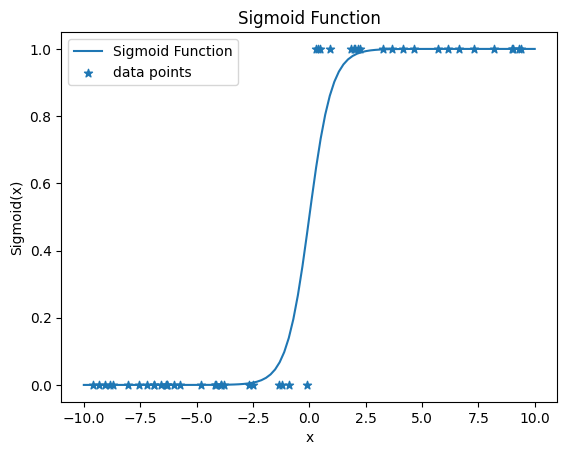

In [67]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-(x*2)))

# Generate data points
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y, label = 'Sigmoid Function')

x = np.random.uniform(-10, 10, 50)
y = [1 if sigmoid(i)>0.5 else 0 for i in x]
plt.scatter(x, y, marker='*', label = 'data points')
plt.legend()
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
# plt.grid(True)
plt.show()


Resources: 
- https://www.youtube.com/watch?v=yIYKR4sgzI8
- https://www.youtube.com/watch?v=YYEJ_GUguHw&list=PLcWfeUsAys2k_xub3mHks85sBHZvg24Jd&index=4